# Profit vs Population
In this exercise I estimate the profit of a company base on the population of the city.

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import fmin_cg
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load the data from a .txt file and observed first 5 examples
df = pd.read_csv('data/data1.txt', names = ['Population','Profit'])
df.head()

Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233

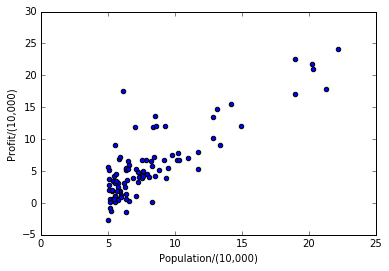

In [3]:
#Plot the data with scaled units
plt.scatter(df['Population'], df['Profit'])
plt.xlabel('Population/(10,000)')
plt.ylabel('Profit/(10,000)')

In [30]:
#Pass data to a matrix to be handle
x = df.as_matrix(columns = ['Population'])
y = df.as_matrix(columns = ['Profit'])

#Number of examples
m = x.shape[0]

#Number of features + 1
n = x.shape[1] + 1

#Initialize fitting parameters
theta_initial = np.zeros(n)

In [46]:
#Function that normalizes the data to match unit scales
def normalize_data(x):
    # normalizaing such that data has mean 0 and std of 1
    mu = x.mean()
    sigma = x.std()
    x = (x - mu) / sigma
    return (x, mu, sigma)

def add_column_ones(x):
    x = np.append(np.ones((x.shape[0], 1)), x, axis = 1)
    return x

#Function that we want minimized
def cost_function(theta, x, y):
    theta = theta.reshape((len(theta), 1))
    pred = np.dot(x, theta)
    J = np.mean((pred - y) ** 2) / 2
    return J

#Gradient of costFunction
def gradient(theta, x, y):
    theta = theta.reshape((len(theta), 1))
    pred = np.dot(x, theta)
    grad = np.dot(x.T, pred - y) / m
    return grad.flatten()

#Prediction for data x using parameters theta
def prediction(theta, x, mu = 0, sigma = 1):
    theta = theta.reshape((len(theta), 1))
    x = x.reshape(len(x), 1)
    x = (x - mu) / sigma
    x = add_column_ones(x)
    pred = np.dot(x, theta)
    return pred

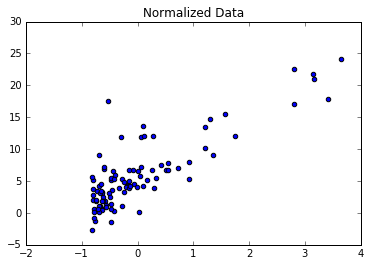

In [47]:
#Normalize data and plot it
X, mu, sigma = normalize_data(x)
plt.scatter(X,y)
plt.title('Normalized Data')

X = add_column_ones(X)

Optimization terminated successfully.
         Current function value: 4.476971
         Iterations: 1
         Function evaluations: 2
         Gradient evaluations: 2
The fitting parameters that minimize the costFunction are Theta = (5.839135,4.593041).        
The plot shows the evolution of the costFunction.


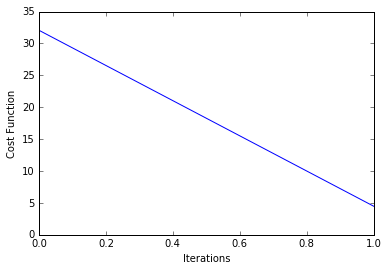

In [63]:
#Perform the minimization of the cost function with the use of its gradient
theta, thetas = fmin_cg(cost_function, theta_initial, fprime = gradient, 
                         args = (X, y), retall = 1, disp = 1)

#Calculate the evolution of the costFunction with every iteration
J = np.zeros(len(thetas))
for i, theta in enumerate(thetas):
    J[i] = cost_function(theta, X, y)
    
plt.plot(range(J.size), J)
plt.xlabel('Iterations')
plt.ylabel('Cost Function')

print 'The fitting parameters that minimize the costFunction are Theta = (%f,%f). \
       \nThe plot shows the evolution of the costFunction.' %(theta[0],theta[1])

This curve achieves a cost function of J = 4.476971


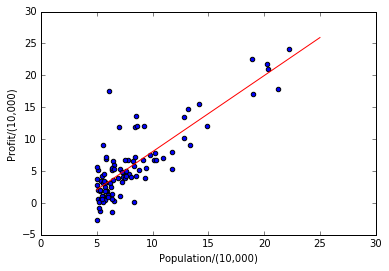

In [72]:
#Plot prediction curve with data
population = np.linspace(5,25,100)
pred = prediction(theta, population, mu, sigma)

plt.scatter(df['Population'], df['Profit'])
plt.plot(population, pred, 'r')
plt.xlabel('Population/(10,000)')
plt.ylabel('Profit/(10,000)')

print 'This curve achieves a cost function of J = %f' % J[-1]

In [71]:
#Make an specific prediction

population = np.array([15])
expected_profit = prediction(theta, population, mu, sigma)

print 'For a population of %d thousand  we expect a profit of $%f' \
       %(population*10,expected_profit*10000) 


For a population of 150 thousand  we expect a profit of $139997.237845
